Rating Joined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('rating.csv')
df2 = pd.read_csv('anime.csv')

df = pd.merge(df1, df2, on='anime_id', how='left')

print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())









In [4]:
df['user_rating'] = df['rating_x'].astype(float)

df['overall_rating'] = df['rating_y'].astype(float)

In [6]:
df.drop(columns=['rating_x', 'rating_y'], inplace=True)

In [7]:
df.head()

,user_id,anime_id,name,genre,type,episodes,members,user_rating,overall_rating
0,1,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297.0,-1.0,7.81
1,1,24,School Rumble,"Comedy, Romance, School, Shounen",TV,26,178553.0,-1.0,8.06
2,1,79,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,158772.0,-1.0,7.31
3,1,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,623511.0,-1.0,7.85
4,1,241,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,84395.0,-1.0,6.69


Users stats

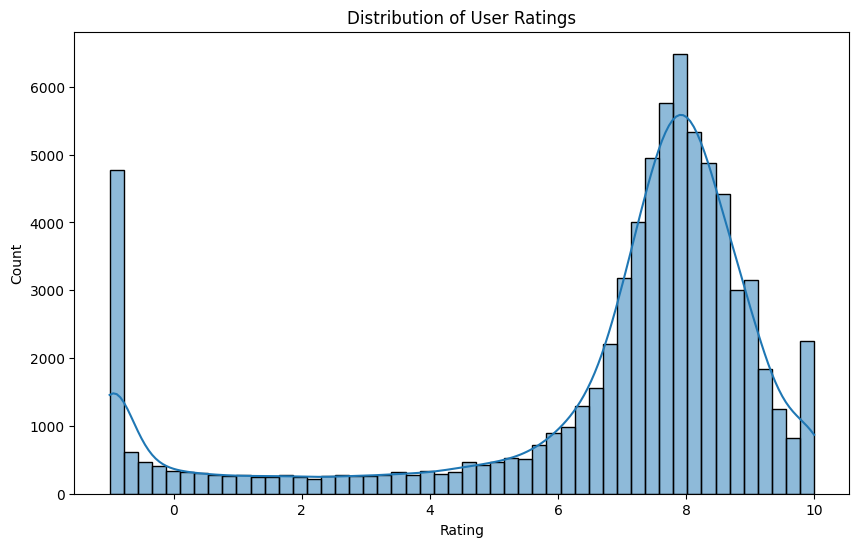

In [15]:
#user behavior analysis
user_stats = df.groupby('user_id')['user_rating'].agg(['mean', 'count'])

#plot the distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(user_stats['mean'], bins=50, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()




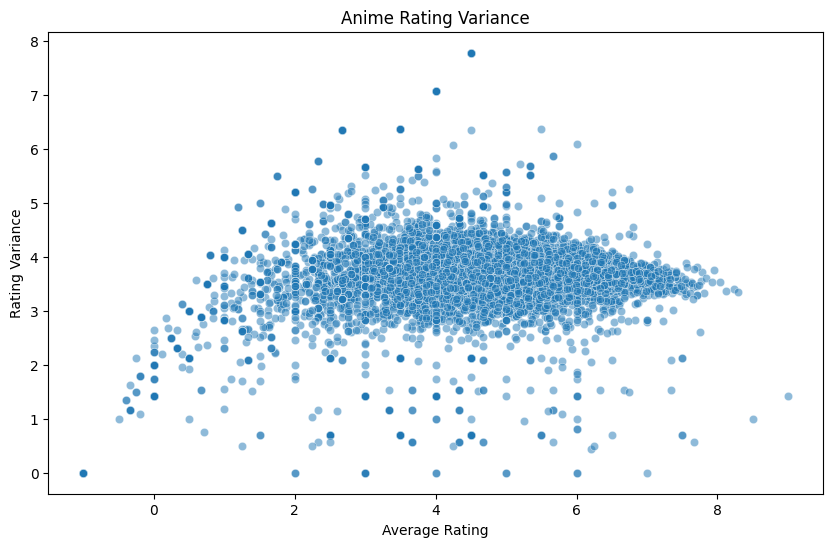

In [17]:
#user variance analysis
anime_stats = df.groupby('anime_id')['user_rating'].agg(['mean', 'std', 'count'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=anime_stats['mean'], y=anime_stats['std'], alpha=0.5)
plt.title('Anime Rating Variance')
plt.xlabel('Average Rating')
plt.ylabel('Rating Variance')
plt.show()


#user variance analysis